<h3 style ="text-decoration: underline"><center>Brief Project : Critiques de films</h3>

### Question : Les notes de films sur Fandango sont-elles sur/sous-évaluées pour augmenter les ventes de films ? 

In [1]:
import pandas as pd 

In [2]:
reviews = pd.read_csv("fandango_scores.csv")

In [3]:
# On attribue au dataframe norm_reviews seulement les colonnes d'intérêt présentes dans le dataframe original
norm_reviews = reviews[["FILM","RT_user_norm",'Metacritic_user_nom',"IMDB_norm","Fandango_Ratingvalue","Fandango_Stars"]]

In [4]:
# On utilise la méthode .set_index() qui permet de passer en index une colonne
# Ici la seule colonne non numérique étant "FILM" on choisit de la mettre en index 
# Afin que l'on puisse accéder aux notes d'un film directement par son titre
norm_reviews = norm_reviews.set_index('FILM')
norm_reviews.head(5)

,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
FILM,,,,,
Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
Cinderella (2015),4.0,3.75,3.55,4.5,5.0
Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


### 1- Diagrammes en barre

In [5]:
import matplotlib.pyplot as plt 
from numpy import arange

# On note le nom des colonnes dans une variable séparée
num_cols = ["RT_user_norm",'Metacritic_user_nom',"IMDB_norm","Fandango_Ratingvalue","Fandango_Stars"]

# On spécifie les coordonnées x de toutes les barres, on veut qu'elles soient situé à 1, 2, 3, 4 et 5
bar_positions = arange(5) + 1

# On spécifie les coordonnées y de toutes les barres pour le film souhaité
# On récupère les valeurs associées à chacune des colonnes pour ce film grâce à values
bar_heights = norm_reviews[num_cols].loc["Avengers: Age of Ultron (2015)"].values

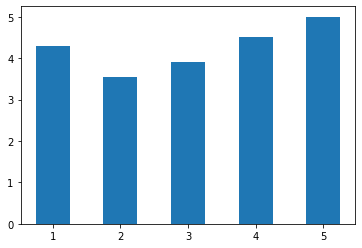

In [8]:
# On initialise la figure en créant un sous-graphique
fig, ax = plt.subplots()

# On passe nos arguments x, y et width pour largeur des barres
ax.bar(bar_positions, bar_heights, width = 0.5)

# On affiche le diagramme en barre
plt.show()

Cependant, cette représentation manque d'informations de type libellé des axes et titre de figure. On améliore donc ce diagramme en barre dans le prochain exercice. 

### 1.1- Alignement de l'intitulé et le trait sur l'axe x 

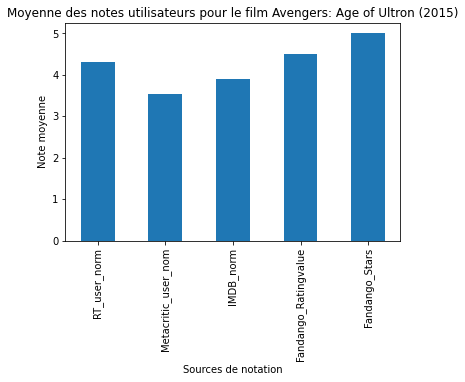

In [10]:
# On initialise un sous-graphique aves les mêmes paramètres que précédemment
fig,ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)

# On définit la position de chacune des barres
ax.set_xticks(bar_positions)

# On remplace le numéro des barres par le nom des colonnes et on les affiche à 90° pour plus de lisibilité
ax.set_xticklabels(num_cols, rotation = 90)

# On définit l'axe des abscisses
ax.set_xlabel("Sources de notation")

# On définit l'axe des ordonnées 
ax.set_ylabel("Note moyenne")

# On définit un titre
ax.set_title("Moyenne des notes utilisateurs pour le film Avengers: Age of Ultron (2015)")

plt.show()

On observe que les notes de Fandango sont plus élevées que pour les notes de Metacritic ou IMDB pour le film Avengers: Age of Ultron (2015).

### 2- Diagramme en barres horizontales

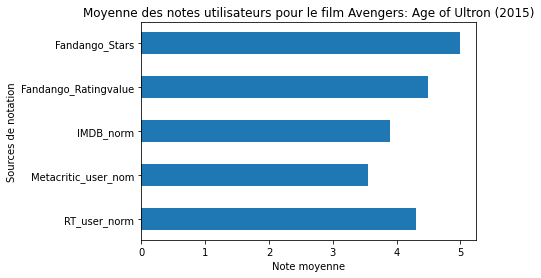

In [13]:
# On initialise un sous_graphiques avec les mêmes paramètres que précédemment
fig,ax = plt.subplots()

# À l'exception qu'il s'agit ici d'un diagramme en barre horizontales
ax.barh(bar_positions, bar_heights, height = 0.5)

# On définit la position de chacune des barres
ax.set_yticks(bar_positions)

# On remplace le numéro des barres par le nom des colonnes 
ax.set_yticklabels(num_cols)

# Définition des libellés des axes et du titre
ax.set_ylabel("Sources de notation")
ax.set_xlabel("Note moyenne")
ax.set_title("Moyenne des notes utilisateurs pour le film Avengers: Age of Ultron (2015)")

plt.show()

### 3- Graphique à nuage de points

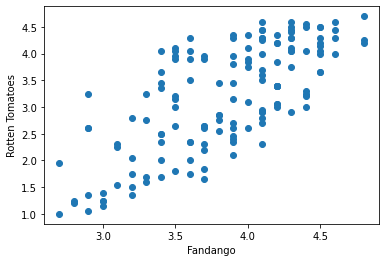

In [14]:
fig, ax = plt.subplots()

x = norm_reviews['Fandango_Ratingvalue']
y = norm_reviews['RT_user_norm']

# On définit les axes
ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")

# On représente un graphique en nuage de points grâce à la fonction .scatter()
ax.scatter(x,y)
plt.show()

Avec ce graphique on représente les notes des films pour le site Rotten Tomatoes en fonction des notes des films pour le site Fandango et on observe que: 
- les films sont notés quasiment de la même manière, plus les notes sont élevée pour le site Fandango plus elles le sont aussi pour le site Rotten Tomatoes.

### 3.1- Intervertir les axes

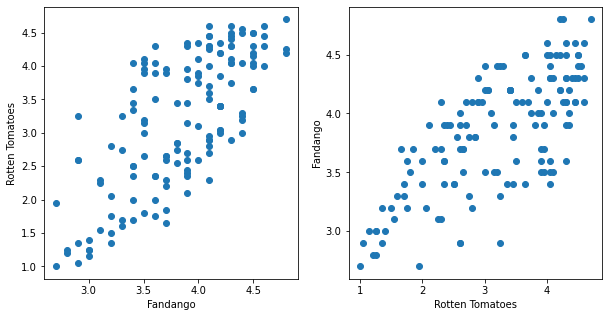

In [146]:
fig = plt.figure(figsize =(10,5))

# On initialise 2 sous-graphiques, le tout présent sur une ligne et 2 colonnes. 
# Le dernier paramètre d'entrée permet de spécifier le sous-graphique sur lequel on travaille
# Ainsi que son positionnement
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Ici, x = norm_reviews['Fandango_Ratingvalue']
# et y = norm_reviews['RT_user_norm']
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])

# On nomme l'axe des abscisses
ax1.set_xlabel('Fandango')

# On nomme l'axe des ordonnées
ax1.set_ylabel("Rotten Tomatoes")

# On fait de même pour le deuxième nuages de points en spécifiant qu'il s'agit bien de ax2
# qui est positionnée en deuxième. 
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_ylabel('Fandango')
ax2.set_xlabel("Rotten Tomatoes")

plt.show()

Après avoir intervertit les axes pour voir l'évolution des notes de films d'un site en fonction de l'autre, on observe qu'il a une certaine corrélation qui serait de type linéaire. On observe une augmentation plus linéaire des notes de films pour le site Fandango que pour le site Rotten Tomatoes. 

### 3.2- Comparaison de corrélations

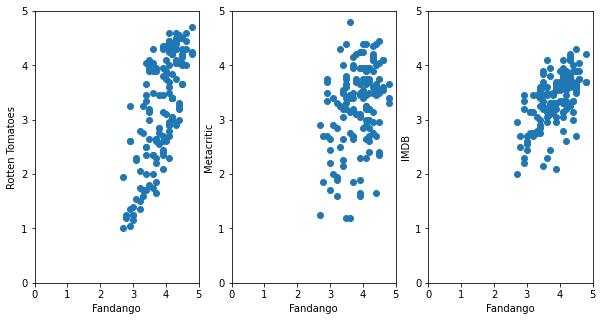

In [151]:
fig = plt.figure(figsize = (10,5))

# On initialise 3 sous-graphiques placés sur une ligne et trois colonnes. 
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel("Rotten Tomatoes")

# On fixe la plage d'affichage de l'axe des abscisses de 0 à 5 
ax1.set_xlim(0,5)

# On fixe la plage d'affichage de l'axe des ordonnées de 0 à 5 
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews["Metacritic_user_nom"])
ax2.set_xlabel('Fandango')
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews["IMDB_norm"])
ax3.set_xlabel('Fandango')
ax3.set_ylabel("IMDB")
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)


plt.show()

Sur ces graphiques, on observe que le snotes de Fandango semblent toutes supérieures à 2.5 alors que les notes des films des autres sites débutent à 1 pour Rotten Tomatoes et Metacritic et à quasiment 2 pour IMDB. La distribution des notes semblent donc plus dispersée que les autres sites que pour Fandango. Il semblerait que Fandango ai donc tendance à surnoter les films. 

In [15]:
# On peut appuyer nos observation graphique par l'étude des coefficient de corrélation
norm_reviews.corr()

,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
RT_user_norm,1.000000,0.687132,0.895297,0.724329,0.703683
Metacritic_user_nom,0.687132,1.000000,0.756265,0.336945,0.337497
IMDB_norm,0.895297,0.756265,1.000000,0.600354,0.587295
Fandango_Ratingvalue,0.724329,0.336945,0.600354,1.000000,0.959709
Fandango_Stars,0.703683,0.337497,0.587295,0.959709,1.000000


On observe donc bien une plus forte correlation entre les notes de Fandango et RT_user norm tandis que cette corrélation semble la plus faible avec le site Metacritic_user_norm et IMDB_norm. 

### 4- Distribution de fréquences

In [61]:
# On utilise la méthode value_counts() afin de retourner le décompte des fréquences de la colonne IMDB_norm
# On trie le résultat par l'index donc le paramètre inplace = False, permet de ne pas affecter les données originales.
imdb_distribution = norm_reviews['IMDB_norm'].value_counts().sort_index(inplace = False)

In [62]:
# On a donc le nombre de fois où chaque note à été attribuée par le site IMDB à des films
imdb_distribution

2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64

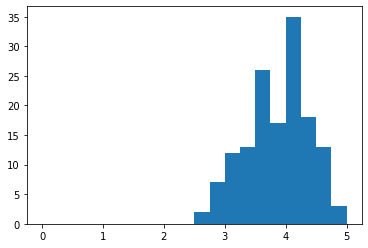

In [16]:
# On initialise un sous_graphique
fig, ax = plt.subplots()

# On génère un histogramme qui nous affiche la fréquence de chacune des notes 
# On affiche le résultat sur une plage de 0 à 5 correspondant aux notations possible
# On spécifique qu'il faut 20 classes grâce à l'argument bins
ax.hist(norm_reviews["Fandango_Ratingvalue"], range=(0,5), bins = 20)

plt.show()


Remarque : L'utilisation de range(0,5) en argument permet de spécifier le nom et la position des barres. En complément, les arguments xlim et ylim permettent de spécifier une champ d'affichage des axes. 

On observe ainsi, sur la distribution de fréquences que pour le site IMDB_norm, la note les plus fréquemment attribuée est 3.60 (10fois), alors que pour le site Fandango la note la plus fréquemment attribuée est supérieur à 4.

### 4.1- Comparaison d'histogrammes

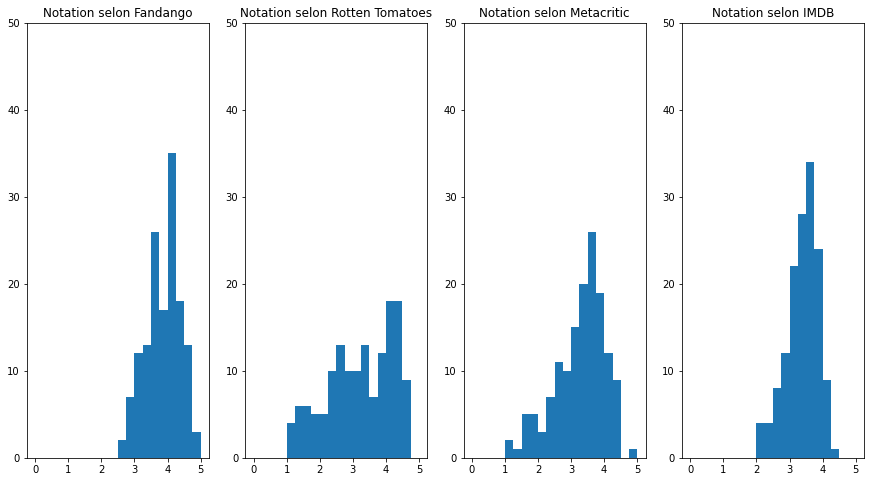

In [155]:
fig = plt.figure(figsize = (15,8))

# On initialise 4 sous-graphiques placés sur une ligne et 4 colonnes. 
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

# On génère un histogramme représentant la distribution de la fréquences des notes
ax1.hist(norm_reviews["Fandango_Ratingvalue"], bins = 20, range = (0,5))

# On définit la plage d'affichage de l'axe des ordonnées ainsi que le titre. 
ax1.set_ylim(0,50)
ax1.set_title("Notation selon Fandango")

ax2.hist(norm_reviews["RT_user_norm"], bins = 20, range = (0,5))
ax2.set_ylim(0,50)
ax2.set_title("Notation selon Rotten Tomatoes")

ax3.hist(norm_reviews["Metacritic_user_nom"], bins = 20, range = (0,5))
ax3.set_ylim(0,50)
ax3.set_title("Notation selon Metacritic")

ax4.hist(norm_reviews["IMDB_norm"], bins = 20, range = (0,5))
ax4.set_ylim(0,50)
ax4.set_title("Notation selon IMDB")

plt.show()

### 5- Plusieurs diagrammes à boîtes

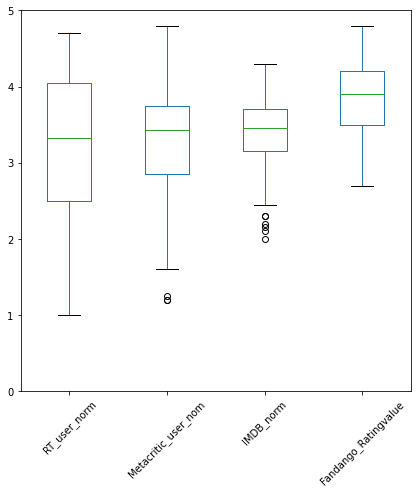

In [129]:
fig = plt.figure(figsize = (7,7)) 

# On créer un nouveau dataframe contenant les colonnes d'intérêts uniquement
new_df = norm_reviews [["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue"]]

# On génère un diagramme à boite, l'argument grid = False fait disparaitre le quadrillage
new_df.boxplot(grid = False)

# On spécifie la plage d'affichage des ordonnées
plt.ylim(0,5)

# On affiche le label des diagramme orienté à 45°
plt.xticks(rotation = 45)
plt.show()

On observe sur ce diagramme à boites que la moyenne des notes de films est équivalent pour RT_user_norm, Metacritic_user_nom et IMDB norm (environ 3.5/5) alors que les notes moyennes des film pour le site Fandango est de 4/5. 
Le site IMDB_norm compte le plus d'outliers et a la dispersion la plus faible, tandis que la dispersion est la plus élevée pour le site RT_user_norm. 

Conclusion: Il semblerait que les notes sur le site Fandango soient bien sur-évaluées pour augmenter les ventes. 